In [24]:
# We imported all the libraries here.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Reading the data
data = pd.read_csv('life_expectancy_data.csv')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,GDP,Life expectancy class
0,Afghanistan,2015,Developing,65.0,263.0,62,584.259210,Low
1,Albania,2015,Developing,77.8,74.0,0,3954.227830,High
2,Algeria,2015,Developing,75.6,19.0,21,4132.762920,Medium
3,Angola,2015,Developing,52.4,335.0,66,3695.793748,Low
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,13566.954100,High
...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,4110.000000,Medium
179,Viet Nam,2015,Developing,76.0,127.0,28,2600.000000,High
180,Yemen,2015,Developing,65.7,224.0,37,1490.000000,Low
181,Zambia,2015,Developing,61.8,33.0,27,1313.889646,Low


In [13]:
features = ['GDP', 'Adult Mortality', 'infant deaths']
target = 'Life expectancy'

# This dictionary will stre the values of the evaluation metrics 
results = {}

for feature in features:
    x = data[feature].to_numpy().reshape(-1, 1)
    y = data[target]
    # We split our dataset into training and testing sets here
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Standardising our features
    scale = StandardScaler()
    scale.fit(x)
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)
    # Initialising our linear regression model
    Linear_regression_model = LinearRegression()
    Linear_regression_model.fit(x_train, y_train)
    # Testing the model
    y_pred = Linear_regression_model.predict(x_test)
    # Evaluation metrics
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    results[feature] = f'mean absolute error:{mean_abs}, mean_squared error:{mean_squared}, R2:{R2}'


Question 1b

<Axes: xlabel='GDP', ylabel='Life expectancy'>

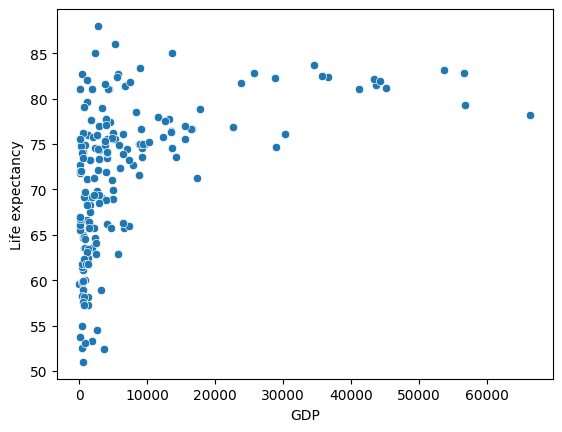

In [53]:
sns.scatterplot(data=data,x=data['GDP'],y=data['Life expectancy'])

In [58]:
degrees = [2, 3, 4, 5]
results = {}
for degree in degrees:
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    x = data['GDP'].to_numpy().reshape(-1, 1)
    y = data['Life expectancy']
    # We split our dataset into training and testing sets here
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    # Standardising our features
    scale = StandardScaler()
    scale.fit(x)
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)
    
    polynomial_model.fit(x_train, y_train)
    y_pred = polynomial_model.predict(x_test)
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    results[f'Degree: {degree}'] = f'mean absolute error:{mean_abs}, mean_squared error:{mean_squared}, R2:{R2}'


In [59]:
results

{'Degree: 2': 'mean absolute error:5.512620340546778, mean_squared error:50.90032575511011, R2:0.25928243206337664',
 'Degree: 3': 'mean absolute error:5.460099648003089, mean_squared error:49.007580039462184, R2:0.2868262637072525',
 'Degree: 4': 'mean absolute error:5.41741835033235, mean_squared error:47.59758637084001, R2:0.307344935553336',
 'Degree: 5': 'mean absolute error:6.218878979487988, mean_squared error:60.782187211795375, R2:0.11547847253473431'}

Question 1c

In [68]:

# Multiple Linear Regression
x = data[['GDP','Adult Mortality','infant deaths']]
y = data['Life expectancy']

# We split our dataset into training and testing sets here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Standardising our features
scale = StandardScaler()
scale.fit(x)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

Linear_regression_model = LinearRegression()
Linear_regression_model.fit(x_train, y_train)
y_pred_linear = Linear_regression_model.predict(x_test)

# Linear model evaluation metrics
mean_abs = mean_absolute_error(y_test, y_pred)
mean_squared = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
linear_regression_metrics ={}
linear_regression_metrics['Mean absolute error: '] = mean_abs
linear_regression_metrics['Mean squared error: '] = mean_squared
linear_regression_metrics['R2 error: '] = R2

# Choosing random forest as the model to compare with the linear regression model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(x_train, y_train)
y_pred_rf = random_forest_model.predict(x_test)
# Random forest model evaluation
mean_abs = mean_absolute_error(y_test, y_pred_rf)
mean_squared = mean_squared_error(y_test, y_pred_rf) 
R2 = r2_score(y_test, y_pred_rf)
random_forest_metrics ={}
random_forest_metrics['Mean absolute error: '] = mean_abs
random_forest_metrics['Mean squared error: '] = mean_squared
random_forest_metrics['R2 error: '] = R2

In [69]:
print(linear_regression_metrics)
print(random_forest_metrics)

{'Mean absolute error: ': 6.218878979487988, 'Mean squared error: ': 60.782187211795375, 'R2 error: ': 0.11547847253473431}
{'Mean absolute error: ': 2.194594594594583, 'Mean squared error: ': 9.337554162162126, 'R2 error: ': 0.8641169716133134}


***Part two. Building unsupervised machine learning models***

In [ ]:
feature_names = ["GDP", "Life expectancy"]
x = data[feature_names]
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)

In [16]:
#  Selecting the features
gdp = ['GDP', 'Life expectancy']
mortality = ['Adult Mortality', 'Life expectancy']

x_gdp = data[gdp]
x_mortality = data[mortality]

# Putting all the features on the same scale by standadising
scaler = StandardScaler()
x_scaled_gdp = scaler.fit_transform(x_gdp)
x_scaled_mortality = scaler.fit_transform(x_mortality)


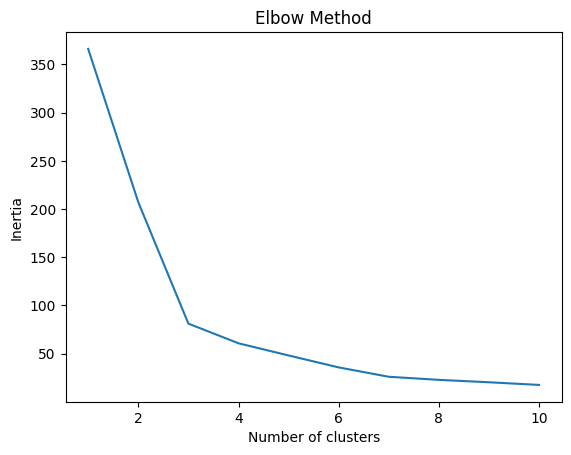

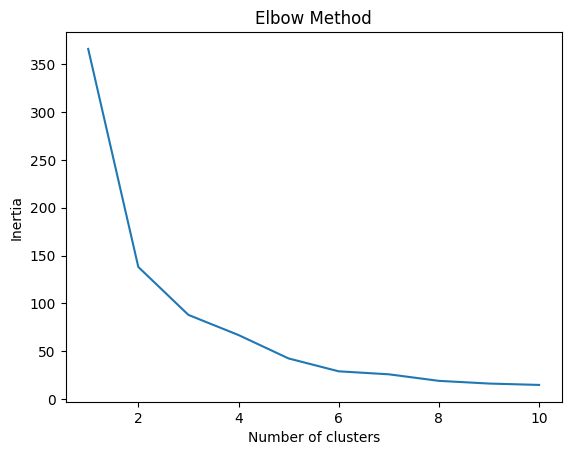

In [18]:
def find_optimal_clusters(data):
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1, 11), inertias)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

find_optimal_clusters(x_scaled_gdp)
find_optimal_clusters(x_scaled_mortality)


In [21]:
# From the graphs above, we can tell that the optimal number of clusters gdp and mortality is 3 and 2 respectively
kmeans_gdp = KMeans(n_clusters=3, random_state=42)
cluster_labels_gdp = kmeans_gdp.fit_predict(x_scaled_gdp)

kmeans_mortality = KMeans(n_clusters=2, random_state=42)
cluster_labels_mortality = kmeans_mortality.fit_predict(x_scaled_mortality)

# Evaluation metrics for GDP
db_score_gdp = davies_bouldin_score(x_scaled_gdp, cluster_labels_gdp)
s_score_gdp = silhouette_score(x_scaled_gdp, cluster_labels_gdp)

# Evaluation metrics for Adult Mortality
db_score_mortality = davies_bouldin_score(x_scaled_mortality, cluster_labels_mortality)
s_score_mortality = silhouette_score(x_scaled_mortality, cluster_labels_mortality)

print(f"GDP vs Life Expectancy - DB Index: {db_score_gdp}, Silhouette Score: {s_score_gdp}")
print(f"Adult Mortality vs Life Expectancy - DB Index: {db_score_mortality}, Silhouette Score: {s_score_mortality}")


GDP vs Life Expectancy - DB Index: 0.5615779766403368, Silhouette Score: 0.5460314165429089
Adult Mortality vs Life Expectancy - DB Index: 0.6022642568987056, Silhouette Score: 0.56268337981288


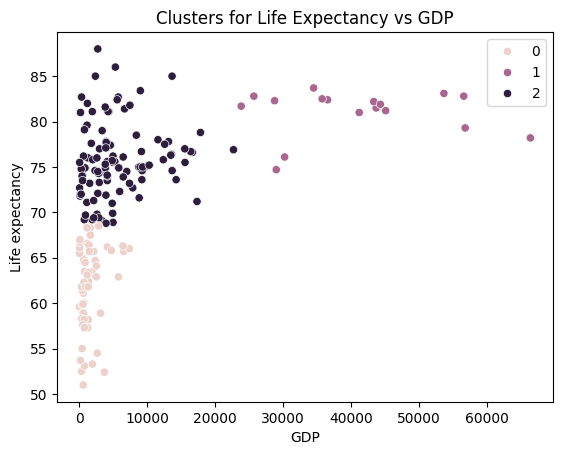

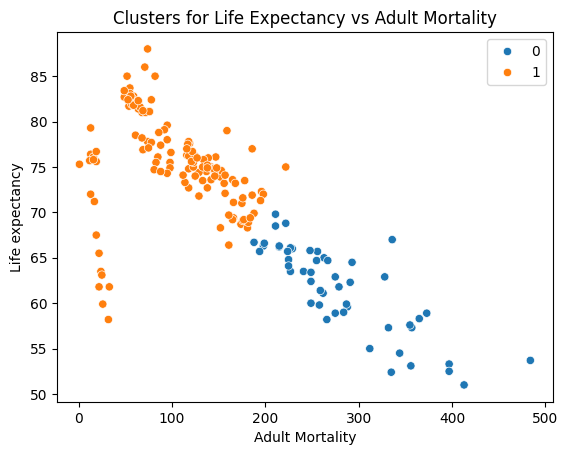

In [23]:
# GDP vs Life Expectancy
sns.scatterplot(data=data, x='GDP', y='Life expectancy', hue=cluster_labels_gdp)
plt.title('Clusters for Life Expectancy vs GDP')
plt.show()

# Adult Mortality vs Life Expectancy
sns.scatterplot(data=data, x='Adult Mortality', y='Life expectancy', hue=cluster_labels_mortality)
plt.title('Clusters for Life Expectancy vs Adult Mortality')
plt.show()


In [26]:
# Agglomerative Hierarchical Clustering
agg_model = AgglomerativeClustering(n_clusters=3, linkage='complete')
agg_labels = agg_model.fit_predict(x_scaled_gdp)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=3)
dbscan_labels = dbscan.fit_predict(x_scaled_gdp)
# Evaluate and compare
def evaluate_clustering(labels, x_scaled):
    if len(set(labels)) > 1:
        db_score = davies_bouldin_score(x_scaled, labels)
        s_score = silhouette_score(x_scaled, labels)
        return db_score, s_score
    else:
        return None, None

db_score_agg, s_score_agg = evaluate_clustering(agg_labels, x_scaled_gdp)
db_score_dbscan, s_score_dbscan = evaluate_clustering(dbscan_labels[dbscan_labels != -1], x_scaled_gdp[dbscan_labels != -1])

print(f"Agglomerative Clustering - DB Index: {db_score_agg}, Silhouette Score: {s_score_agg}")
print(f"DBSCAN - DB Index: {db_score_dbscan}, Silhouette Score: {s_score_dbscan}")

Agglomerative Clustering - DB Index: 0.5587872686815339, Silhouette Score: 0.4433629465009534
DBSCAN - DB Index: 0.34319395868764746, Silhouette Score: 0.4335973652540476


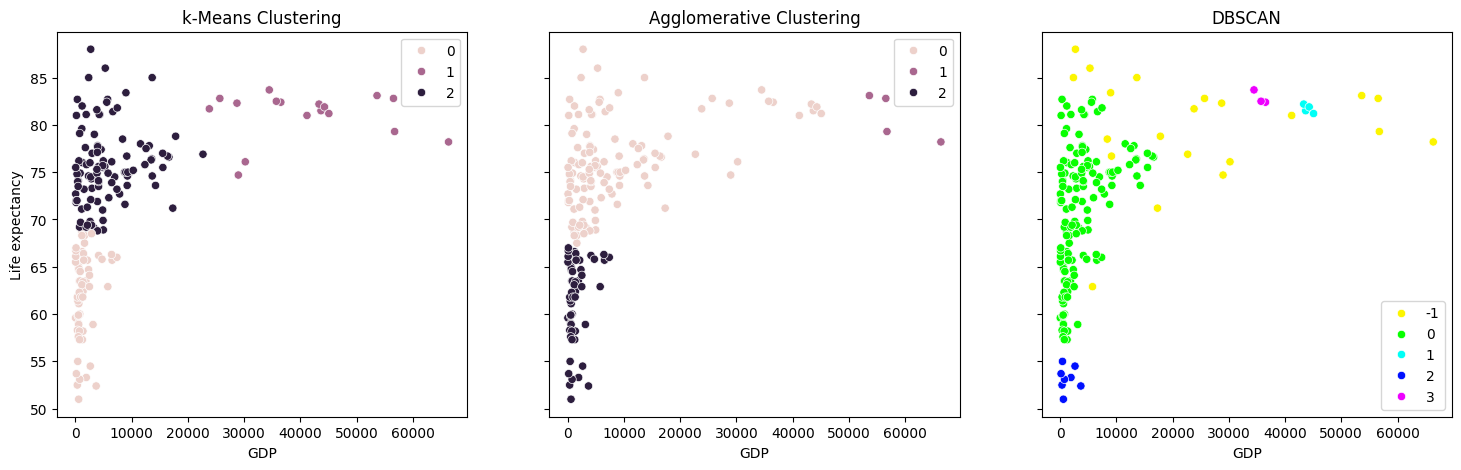

In [30]:
# Visualize the clustering for comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)

sns.scatterplot(ax=ax[0], data=data, x='GDP', y='Life expectancy', hue=cluster_labels_gdp)
ax[0].set_title('k-Means Clustering')

sns.scatterplot(ax=ax[1], data=data, x='GDP', y='Life expectancy', hue=agg_labels)
ax[1].set_title('Agglomerative Clustering')

# For DBSCAN, assign a separate color for noise (-1)
palette = sns.color_palette("hsv", len(set(dbscan_labels)))
sns.scatterplot(ax=ax[2], data=data, x='GDP', y='Life expectancy', hue=dbscan_labels, palette=palette)
ax[2].set_title('DBSCAN')
plt.show()
